In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import metrics
from keras.callbacks import History 

import tensorflow as tf

In [2]:
x = np.random.uniform(low = -10, high = 10, size = 100)
eps = np.random.normal(loc = 0, scale = 15, size = 100)

In [3]:
y = -3 * x + 5 + eps

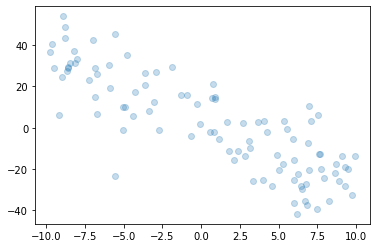

In [4]:
plt.scatter(x, y, alpha = 0.25)

In [5]:
np.mean(y)

1.7686944867484795

In [6]:
a, b = np.polyfit(x, y, deg = 1)

In [7]:
a

-3.169450877908774

In [8]:
b

3.7304929269592164

In [10]:
ypred = a * x + b

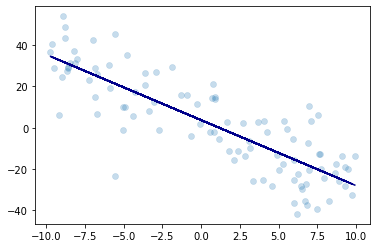

In [11]:
plt.scatter(x, y, alpha = 0.25, linewidths= 0.5)
plt.plot(x, ypred, color = 'darkblue')

In [12]:
rede_simples = keras.models.Sequential()
rede_simples.add(keras.layers.Dense(1, input_shape=(1, )))

In [13]:
rede_simples.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
rede_simples.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.0001))

In [15]:
rede_simples.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(rede_simples, show_shapes = True)

In [ ]:
rede_simples.fit(x, y, batch_size=5, epochs=40, verbose=2)

In [ ]:
plt.scatter(x, y, alpha = 0.25, linewidths= 0.5)
plt.plot(x, ypred_rede[0], color = 'darkblue', label = 'Rede neural')
plt.plot(x, ypred, color = 'red', label = 'Modelo linear')
plt.legend()

In [ ]:
rede_simples.fit(x=X_train, 
          y=Y_train, 
          epochs=100, 
          batch_size=3,
          validation_data=(X_test, Y_test), 
          callbacks=[tensorboard_callback])

In [ ]:
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

rede_menos_simples = keras.models.Sequential()
rede_menos_simples.add(keras.layers.BatchNormalization())
rede_menos_simples.add(keras.layers.Dense(3, input_shape=(1, )))
rede_menos_simples.add(keras.layers.Dense(1, activation='tanh'))

rede_menos_simples.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.001))

rede_menos_simples.fit(x=X_train, 
          y=Y_train, 
          epochs=500, 
          batch_size=5,
          validation_data=(X_test, Y_test), 
          callbacks=[tensorboard_callback])

In [ ]:
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.1)

rede_simples.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=lr_scheduler), metrics=['mae'])

In [ ]:
rede_simples.fit(x=X_train, 
          y=Y_train, 
          epochs=500, 
          batch_size=10,
          validation_data=(X_test, Y_test), 
          callbacks=[stopper])

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
